In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm

In [4]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler


In [5]:
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [6]:

import warnings
warnings.filterwarnings('ignore')

Importing, cleaning, and describing the data

In [7]:
# Load the data into a Pandas DataFrame
heart_df = pd.read_csv(
    "Resources/heart.csv")

# Display DataFrame

heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Get a brief summary of the heart_attack DataFrame.
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Generate summary statistics
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# check for null values
heart_df.isnull().values.any() 

False

In [11]:
# find duplicates and remove duplicates
heart_df.duplicated()
df = heart_df.drop_duplicates()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Exploratory Data Analysis (EDA)

In [13]:
#Check for unique values in each column
unique_value_counts = df.nunique()
print(unique_value_counts)

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


In [14]:
numeric_var = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]
numerical_axis_name = ["Age of the Patient","Resting Bloodpressure","Cholestrol","Maximum Heart Rate","ST Depression"]
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thalassemia", "Target"]

In [15]:
list(zip(numeric_var, numerical_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Bloodpressure'),
 ('chol', 'Cholestrol'),
 ('thalachh', 'Maximum Heart Rate'),
 ('oldpeak', 'ST Depression')]

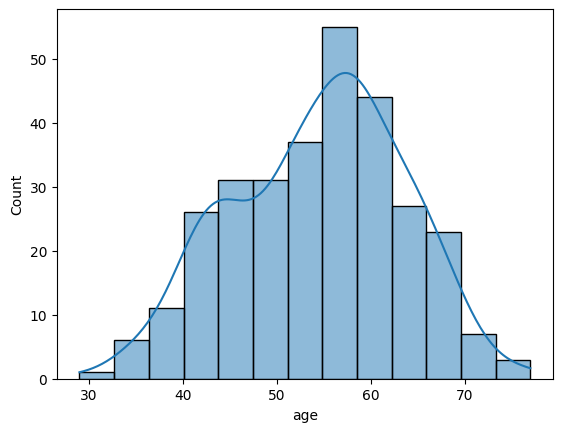

In [16]:
sns.histplot(df["age"], kde=True, edgecolor="k", linewidth=1)

plt.show()

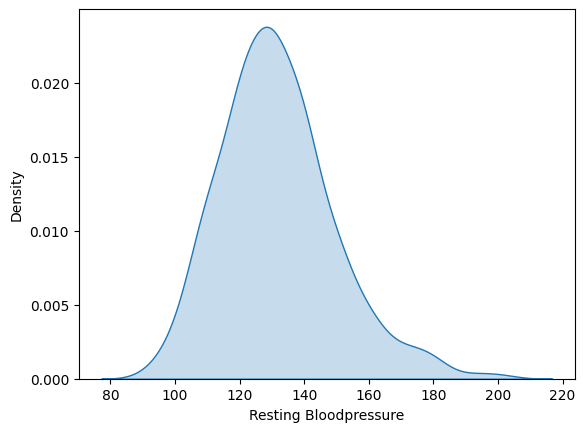

In [17]:
sns.kdeplot(df["trtbps"], shade=True)
plt.xlabel("Resting Bloodpressure")
plt.show()

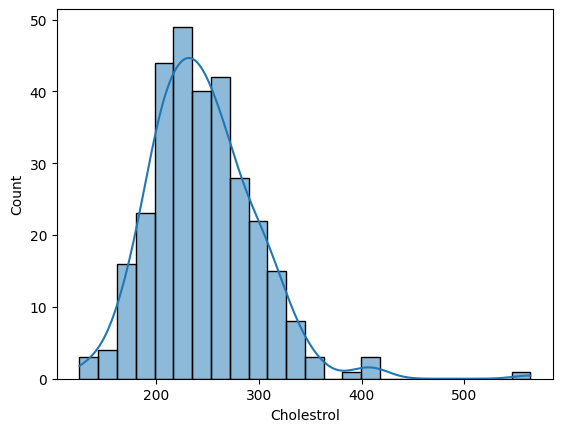

In [18]:
sns.histplot(df["chol"], kde=True, edgecolor="k", linewidth=1)
plt.xlabel("Cholestrol")
plt.show()

Text(0.5, 0, 'Maximum Heart Rate')

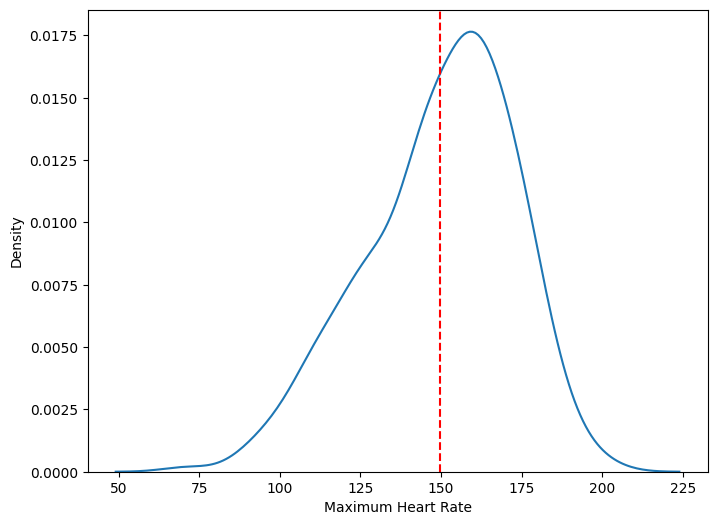

In [19]:
x, y = plt.subplots(figsize = (8,6))
sns.distplot(df["thalachh"], hist = False, ax = y)
y.axvline(df["thalachh"].mean(), color = "r", ls = "--");
plt.xlabel("Maximum Heart Rate")

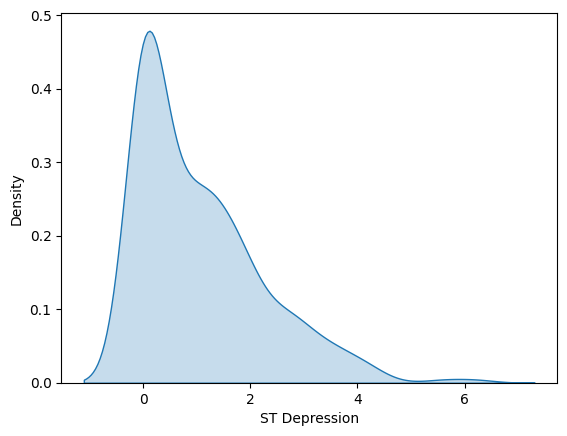

In [20]:
sns.kdeplot(df["oldpeak"], shade=True)
plt.xlabel("ST Depression")
plt.show()

Bi-variate analysis of Numeric variables and the output variable

In [21]:
numeric_var.append("output")

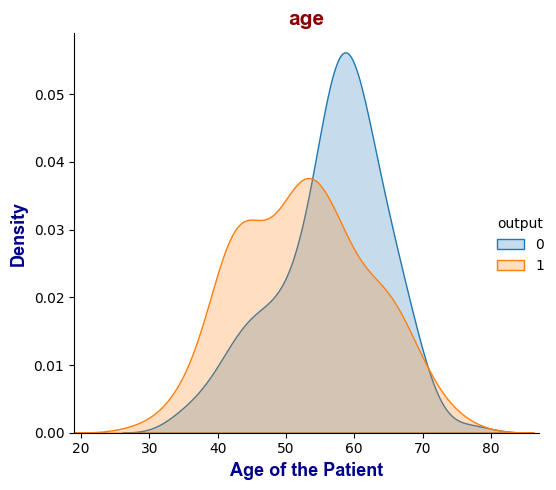

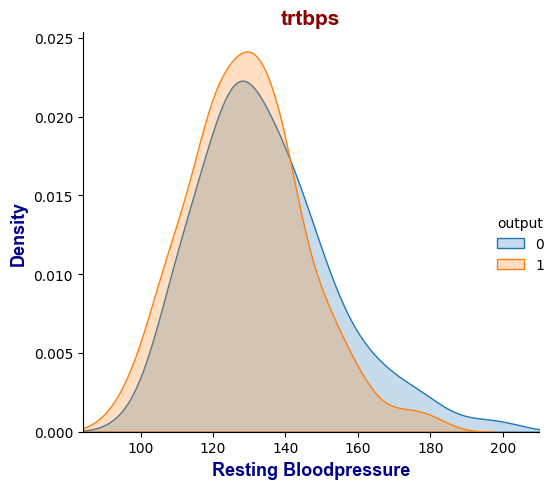

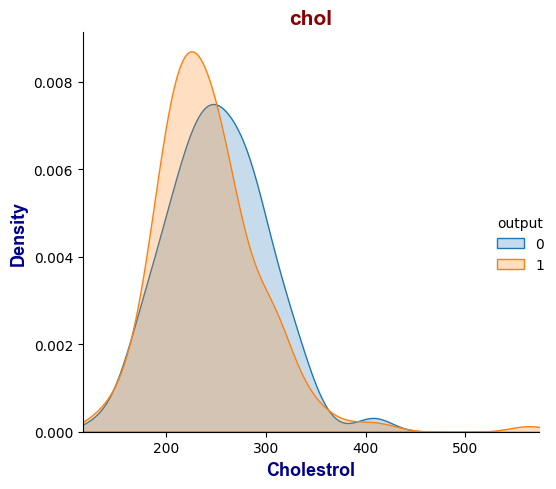

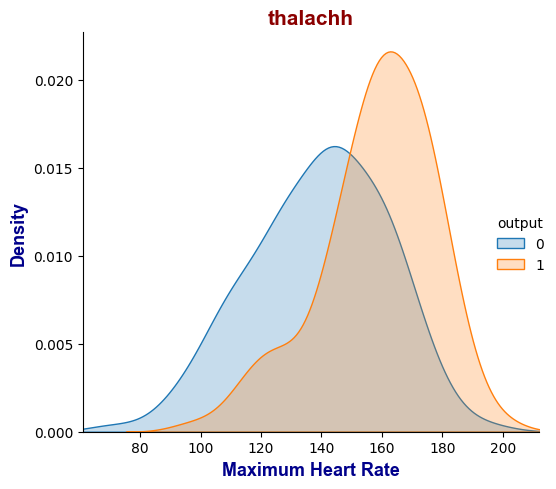

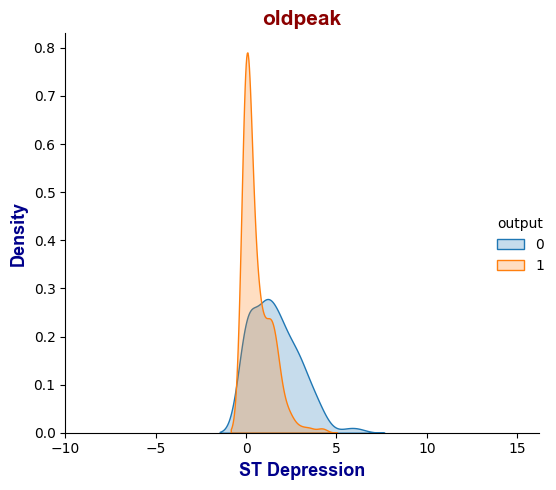

In [22]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numerical_axis_name)):
    
    graph = sns.FacetGrid(df[numeric_var], hue = "output", height = 5, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

Univariate analysis of Categorical Variables

In [23]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('restecg', 'Resting Electrocardiographic Results'),
 ('exng', 'Exercise Induced Angina'),
 ('slp', 'The Slope of ST Segment'),
 ('caa', 'Number of Major Vessels'),
 ('thall', 'Thalassemia'),
 ('output', 'Target')]

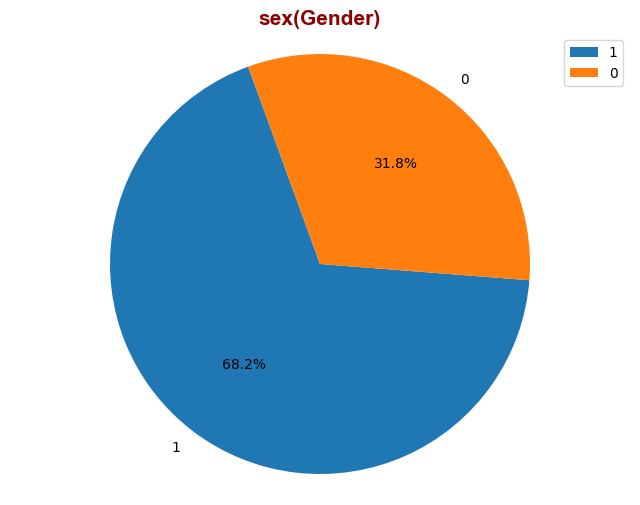

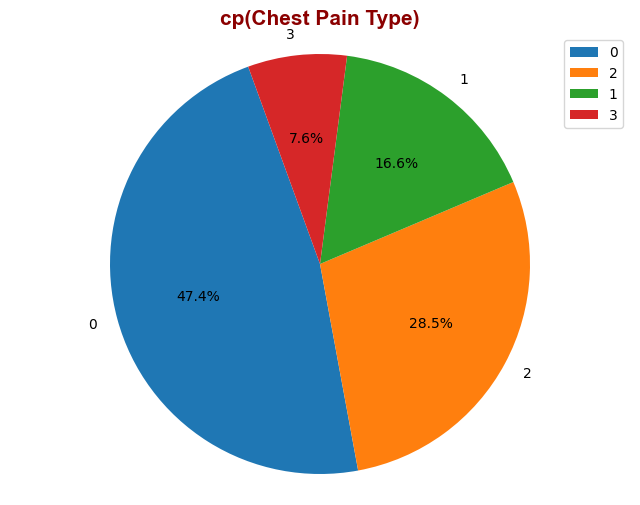

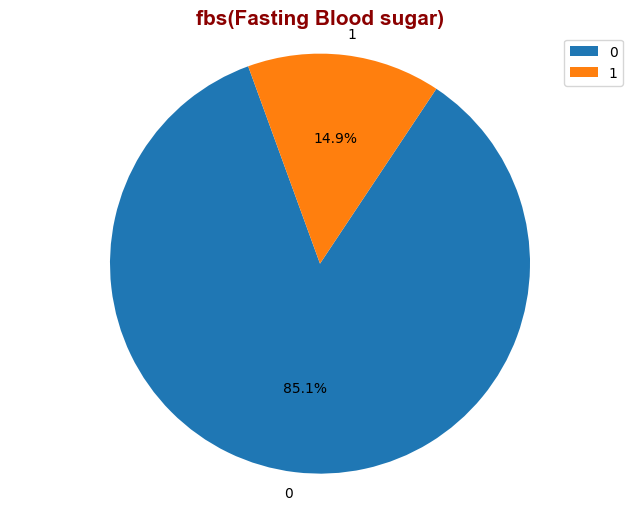

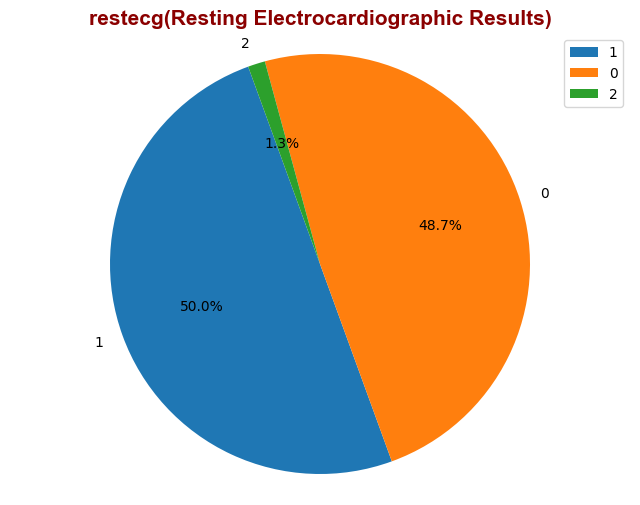

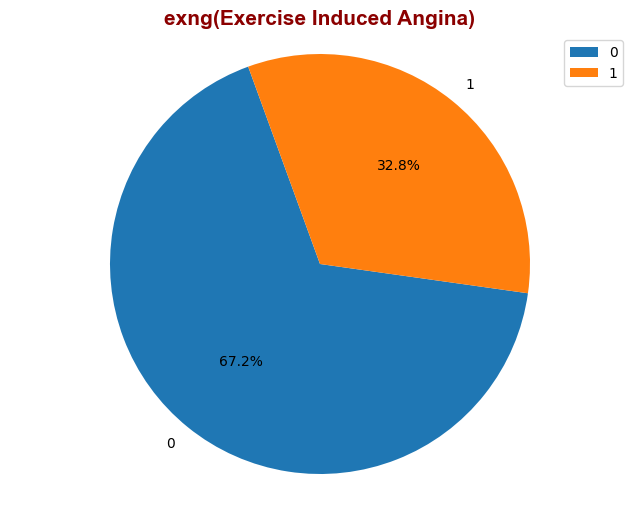

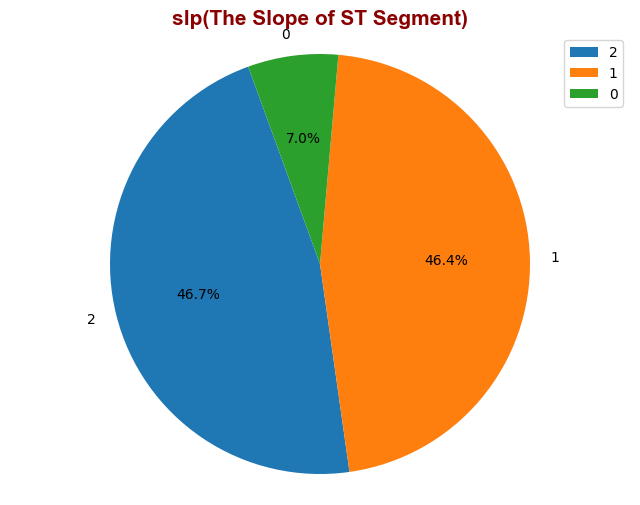

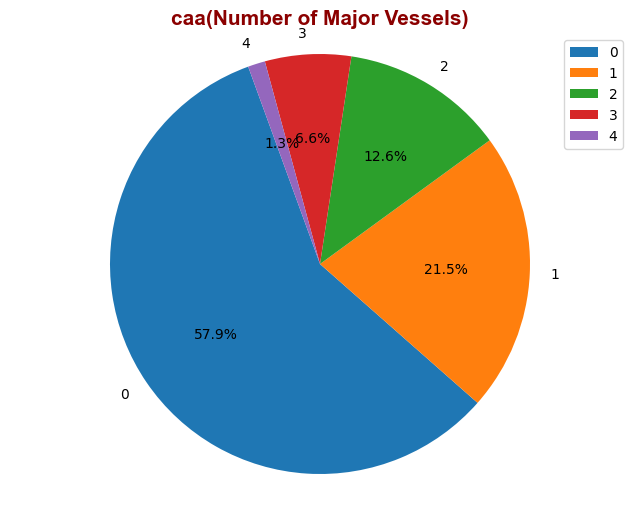

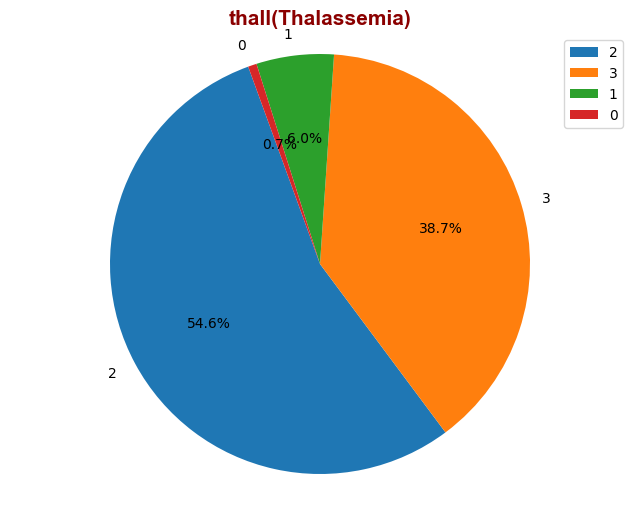

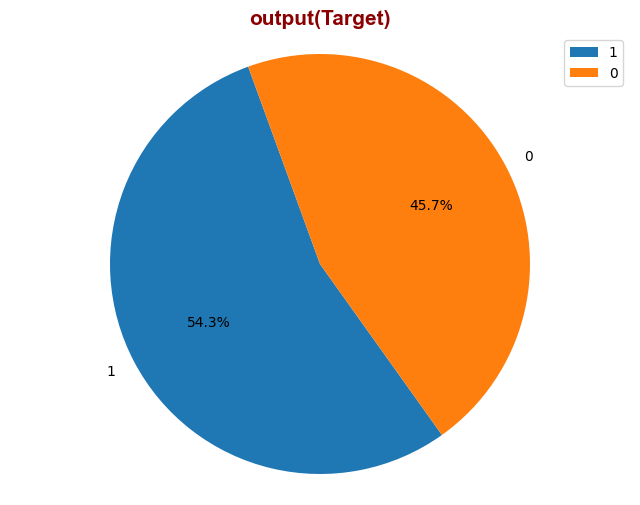

In [24]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8,6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") 
    
    plt.title((i + "(" + z + ")"), fontdict = title_font) 
    plt.legend()
    plt.show()

Analysis Outputs

Sex Variable 68.2% of the patients are male (1), 31.8% are female(0). So, the number of male patients is more than twice that of female patients.

Cp Variable Almost half of the patients have an observation value of 0. In other words, there is asymptomatic angina Half of the patients are asymptomatic; they have pain without symptoms. If we examine the other half of the pie chart, 1 out of 4 patients has an observation value of 2. In other words, atypical angina is in 28.5% of the patients. This observation value shows patients with shortness of breath or non-classical pain. The other two observation values are less than the others. 16.6% of patients have a value of 1. In other words, typical angina is seen. Typical angina is the classic exertion pain that comes during any physical activity. The other 7.6% has the value of non-anginal pain, which is three types of angina. Non-anginal pain is the term used to describe chest pain that is not caused by heart disease or a heart attack.

Fbs Variable The vast majority of patients have an observation value of 1. In other words, 85.1%. The fasting blood sugar of these patients is more than 120 mg/dl. The remaining 14.9 percent have a less than 120 mg/dl fasting blood glucose level.

Rest_ecg Variable The thing that draws attention to the image of this variable is that the number of patients with 2 observation values is negligible. It has a value of 1.3 percent. When we look at all of these patients, it is not a very important number. This value represents the ST and T wavelengths of the patients. Another point that draws attention to this graph is; The total numbers of other patients with observation values of 1 and 0 are almost equal. The size of those with 1, that is, the orange part on the graph is 50.0% This means that the resting electrocardiographic results of these patients are normal. The percentage of patients with a value of 0 is 48.7%. That is, the patients' values of 48.7% are normal.

Exang Variable We have said that this variable stands for exercise-induced angina. Angina is the chest pain caused by the coronary artery's involuntary contraction that feeds the heart. According to the variable "exang," the pain caused by this angina is represented by a value of 1 if it occurs with any exercise and 0 if it does not. In this context, Values 0 are more than twice as values 1. More than half of the patients do not have exercise-induced angina.

Slope Variable The minimum observation value is 0 with 7 percent. This is patients with a downward slope of the ST wavelength. The other two observation values are almost equal to each other. The ST wavelength of half of the remaining patients is 1, that is straight, while the observation value of the other half is 2, that is, the ST wavelength is sloped upwards.

Caa variable This variable is the number of great vessels colored by fluoroscopy. In more than half of the patients, 57.9 percent, the number of large vessels is 0. That is, the number of large vessels colored by fluoroscopy is absent. After 0 observation value, the other value with the most slices in the pie chart 1 The number of large vessels observed in 21.5% of the patients is 1 The majority of patients have an occlusion in their veins. Therefore, large vessels cannot be observed with the fluoroscopy technique.

Thal Variable The "Thal" variable is short for the "Thallium stress test." The thallium stress test is simply an imaging method that evaluates the amount of blood reaching the heart muscle and determines whether a person has coronary artery disease. There are three observation values in the description of this variable. However, the pie chart shows four values. Values 0, 1, 2 and 3. According to our research, the observation value of 0 is null. Therefore, in the next step, 0 observation values will be returned to null and filled with logical data. In this context, according to the thallium stress test results, 54.6 percent of the patients have 2 observation values, so the test result appears to be expected. 38.7 percent has a value of 3, so we can say that this value is a reversible defect as an explanation. 6.0 percent of patients have a value of 1, so the test result for these patients is a fixed defect.

Target Variable More than half of the patients, 54.3 percent, have a heart attack risk. The remaining 45.7 percent have no heart attack risk.

Bi-variate analysis of Categorical variables and the output variable

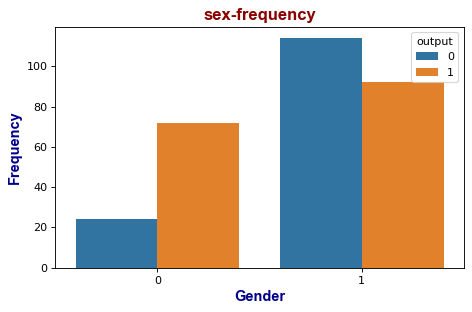

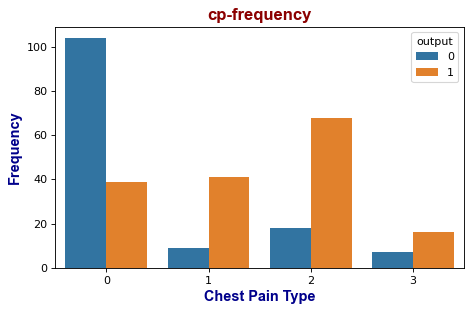

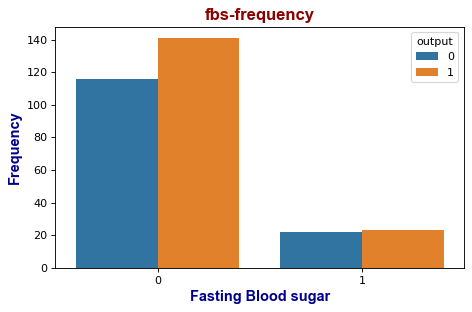

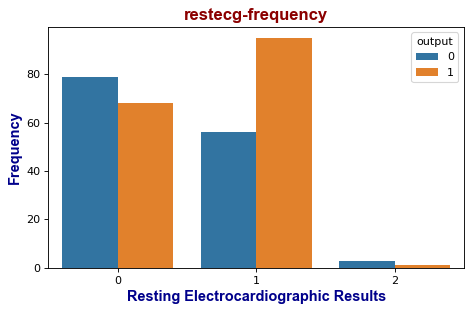

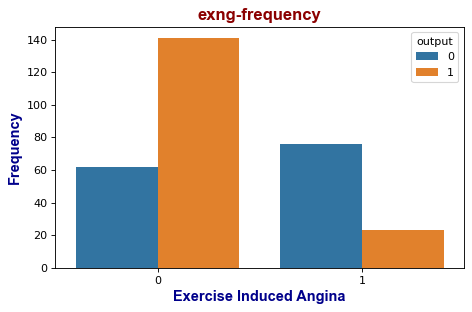

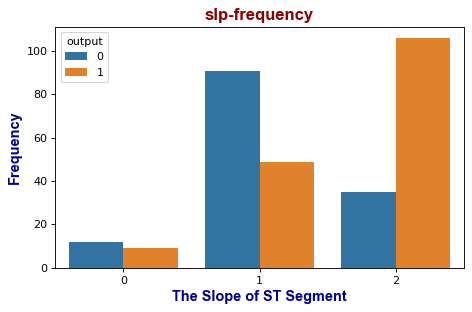

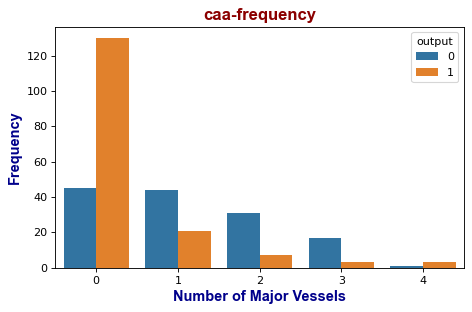

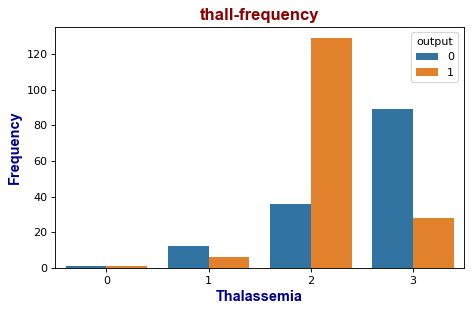

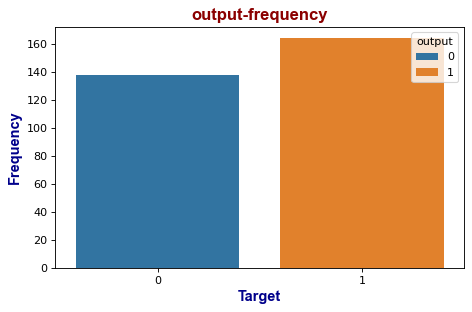

In [25]:
title_font = {"family":"arial","color":"darkred","weight":"bold","size":15}
axis_font = {"family":"arial","color":"darkblue","weight":"bold","size":13}
for i,z in list(zip(categoric_var,categoric_axis_name)):
    plt.figure(figsize=(6,4),dpi=80)
    sns.countplot(data=df[categoric_var],x=i,hue="output")
    plt.title(i+"-frequency",fontdict=title_font)
    plt.xlabel(z,fontdict=axis_font)
    plt.ylabel("Frequency",fontdict=axis_font)
    plt.tight_layout()
    plt.show()

Logistic Regression

In [26]:
y = df["output"]
X = df.drop(columns="output")


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create the Logistic Regression classifier
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)

# Train the classifier
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [27]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8451327433628318
Testing Data Score: 0.868421052631579


In [28]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


In [29]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.868421052631579

In [30]:
#Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [31]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print('\n')
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,28,7
Actual 1,3,38


Accuracy Score : 0.868421052631579


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        35
           1       0.84      0.93      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.87        76
weighted avg       0.87      0.87      0.87        76



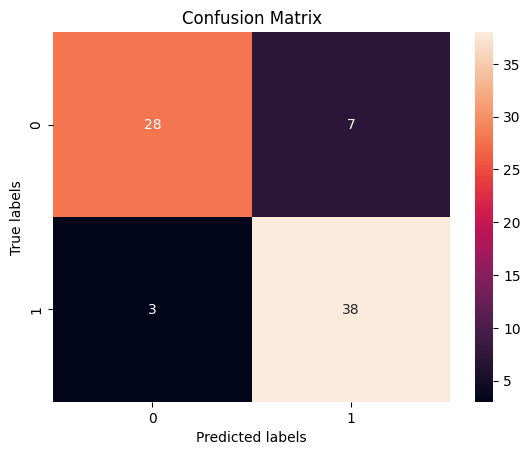

In [32]:
ax= plt.subplot()
sns.heatmap(cm_df, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

Decision Tree

In [33]:
X = df.copy()
X.drop("output", axis=1, inplace=True)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [34]:
# Define target vector
y = df["output"].values.reshape(-1, 1)
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [35]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [36]:
scaler = StandardScaler()  

In [37]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [38]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [40]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

In [41]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [42]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [43]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print('\n')
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,35,7
Actual 1,4,30


Accuracy Score : 0.8552631578947368


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        42
           1       0.81      0.88      0.85        34

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76



Random Forest

In [44]:
X = df.copy()
X.drop("output", axis=1, inplace=True)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [45]:
# Define target vector
y = df["output"].ravel()
y[:5]

array([1, 1, 1, 1, 1])

In [46]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [47]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [48]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [49]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [50]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=78)

In [51]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [52]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [53]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [54]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print('\n')
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,36,6
Actual 1,4,30


Accuracy Score : 0.868421052631579


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.83      0.88      0.86        34

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [55]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1403517436745771, 'cp'),
 (0.12313450623121143, 'thall'),
 (0.11864541742014986, 'oldpeak'),
 (0.10487264715868076, 'thalachh'),
 (0.09769921382655303, 'caa'),
 (0.09129862970425448, 'age'),
 (0.07614780813574785, 'chol'),
 (0.07282003462182618, 'trtbps'),
 (0.06265821768847141, 'exng'),
 (0.047283378288833035, 'sex'),
 (0.032012819940349296, 'slp'),
 (0.02216469278672693, 'restecg'),
 (0.010910890522618543, 'fbs')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

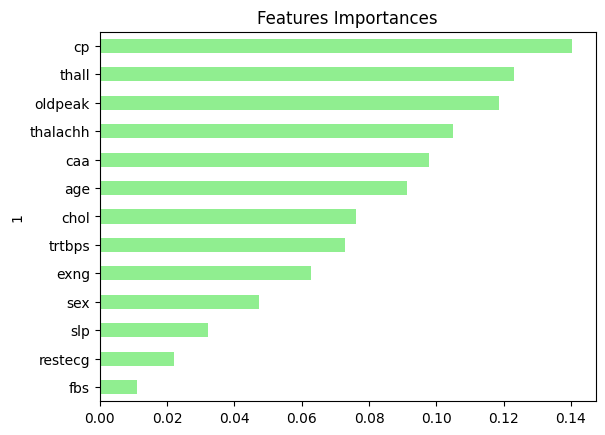

In [56]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)